# Introduction to scikit-learn

## Basic preprocessing and model fitting

In this notebook, we present how to build predictive models on
tabular datasets.

In particular we will highlight:
* the difference between numerical and categorical variables;
* the importance of scaling numerical variables;
* typical ways to deal categorical variables;
* train predictive models on different kinds of data;
* evaluate the performance of a model via cross-validation.

## Introducing the dataset

To this aim, we will use data from the 1994 Census bureau
database. The goal with this data is to regress wages from
heterogeneous data such as age, employment, education, family
information, etc.

Let's first load the data located in the `datasets` folder.

In [1]:
import pandas as pd

df = pd.read_csv(
    "https://www.openml.org/data/get_csv/1595261/adult-census.csv")

# Or use the local copy: df = pd.read_csv('../datasets/adult-
# census.csv')

Let's have a look at the first records of this data frame:

In [2]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


The target variable in our study will be the "class" column while
we will use the other columns as input variables for our model.
This target column divides the samples (also known as records) into
two groups: high income (>50K) vs low income (<=50K). The resulting
prediction problem is therefore a binary classification problem.

For simplicity, we will ignore the "fnlwgt" (final weight) column
that was crafted by the creators of the dataset when sampling the
dataset to be representative of the full census database.

In [3]:
target_name = "class"
target = df[target_name].to_numpy()
target

array([' <=50K', ' <=50K', ' >50K', ..., ' <=50K', ' <=50K', ' >50K'],
      dtype=object)

In [4]:
data = df.drop(columns=[target_name, "fnlwgt"])
data.head()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States
4,18,?,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States


We can check the number of samples and the number of features
available in the dataset:

In [5]:
print(
    f"The dataset contains {data.shape[0]} samples and {data.shape[1]} "
    "features")

The dataset contains 48842 samples and 13 features


## Working with numerical data

The numerical data is the most natural type of data used in
machine learning and can (almost) directly be fed to predictive
models. We can quickly have a look at such data by selecting the
subset of columns from the original data.

We will use this subset of data to fit a linear classification
model to predict the income class.

In [6]:
data.columns

Index(['age', 'workclass', 'education', 'education-num', 'marital-status',
       'occupation', 'relationship', 'race', 'sex', 'capital-gain',
       'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')

In [7]:
data.dtypes

age                int64
workclass         object
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
dtype: object

In [8]:
numerical_columns = [
    c for c in data.columns if data[c].dtype.kind in ["i", "f"]]
numerical_columns

['age', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']

In [9]:
data_numeric = data[numerical_columns]
data_numeric.head()

,age,education-num,capital-gain,capital-loss,hours-per-week
0,25,7,0,0,40
1,38,9,0,0,50
2,28,12,0,0,40
3,44,10,7688,0,40
4,18,10,0,0,30


When building a machine learning model, it is important to leave
out a subset of the data which we can use later to evaluate the
trained model. The data used to fit a model a called training data
while the one used to assess a model are called testing data.

Scikit-learn provides an helper function `train_test_split` which
will split the dataset into a training and a testing set. It will
ensure that the data are shuffled randomly before splitting the
data.

In [10]:
from sklearn.model_selection import train_test_split

data_train, data_test, target_train, target_test = train_test_split(
    data_numeric, target, random_state=42)

print(
    f"The training dataset contains {data_train.shape[0]} samples and "
    f"{data_train.shape[1]} features")
print(
    f"The testing dataset contains {data_test.shape[0]} samples and "
    f"{data_test.shape[1]} features")

The training dataset contains 36631 samples and 5 features
The testing dataset contains 12211 samples and 5 features


We will build a linear classification model called "Logistic
Regression". The `fit` method is called to train the model from the
input and target data. Only the training data should be given for
this purpose.

In addition, when checking the time required to train the model
and internally check the number of iterations done by the solver to
find a solution.

In [11]:
from sklearn.linear_model import LogisticRegression
import time

model = LogisticRegression(solver='lbfgs')
start = time.time()
model.fit(data_train, target_train)
elapsed_time = time.time() - start

print(f"The model {model.__class__.__name__} was trained in "
      f"{elapsed_time:.3f} seconds for {model.n_iter_} iterations")

The model LogisticRegression was trained in 1.321 seconds for [100] iterations


/home/glemaitre/Documents/packages/scikit-learn/sklearn/linear_model/logistic.py:932: ConvergenceWarning: lbfgs failed to converge (status=1): b'STOP: TOTAL NO. of ITERATIONS REACHED LIMIT'. Increase the number of iterations.
  n_iter_i = _check_optimize_result(solver, opt_res, max_iter)


Let's ignore the convergence warning for now and instead let's
try to use our model to make some predictions on the first three
records of the held out test set:

In [12]:
target_predicted = model.predict(data_test)
target_predicted[:5]

array([' <=50K', ' <=50K', ' >50K', ' <=50K', ' <=50K'], dtype=object)

In [13]:
target_test[:5]

array([' <=50K', ' <=50K', ' >50K', ' <=50K', ' <=50K'], dtype=object)

In [14]:
predictions = data_test.copy()
predictions['predicted-class'] = target_predicted
predictions['expected-class'] = target_test
predictions['correct'] = target_predicted == target_test
predictions.head()

,age,education-num,capital-gain,capital-loss,hours-per-week,predicted-class,expected-class,correct
7762,56,9,0,0,40,<=50K,<=50K,True
23881,25,9,0,0,40,<=50K,<=50K,True
30507,43,13,14344,0,40,>50K,>50K,True
28911,32,9,0,0,40,<=50K,<=50K,True
19484,39,13,0,0,30,<=50K,<=50K,True


To quantitatively evaluate our model, we can use the method
`score`. It will compute the classification accuracy when dealing
with a classification problem.

In [15]:
print(f"The test accuracy using a {model.__class__.__name__} is "
      f"{model.score(data_test, target_test):.3f}")

The test accuracy using a LogisticRegression is 0.818


This is mathematically equivalent as computing the average number
of time the model makes a correct prediction on the test set:

In [16]:
(target_test == target_predicted).mean()

0.8177053476373761

## Exercise 1

- What would be the score of a model that always predicts
  `'>50K'`?
- What would be the score of a model that always predicts
  `' <= 50K'`?
- Is 81% or 82% accuracy a good score for this problem?

Hint: You can compute the cross-validated of a
[DummyClassifier](https://scikit-learn.org/stable/modules/model_evaluation.html#dummy-estimators)
the performance of such baselines.

Use the dedicated notebook to do this exercise.

Let's now consider the `ConvergenceWarning` message that was
raised previously when calling the `fit` method to train our model.
This warning informs us that our model stopped learning because it
reached the maximum number of iterations allowed by the user. This
could potentially be detrimental for the model accuracy. We can
follow the (bad) advice given in the warning message and increase
the maximum number of iterations allowed.

In [17]:
model = LogisticRegression(solver='lbfgs', max_iter=50000)
start = time.time()
model.fit(data_train, target_train)
elapsed_time = time.time() - start

In [18]:
print(
    f"The accuracy using a {model.__class__.__name__} is "
    f"{model.score(data_test, target_test):.3f} with a fitting time of "
    f"{elapsed_time:.3f} seconds in {model.n_iter_} iterations")

The accuracy using a LogisticRegression is 0.818 with a fitting time of 1.984 seconds in [105] iterations


We can observe now a longer training time but not significant
improvement in the predictive performance. Instead of increasing
the number of iterations, we can try to help fit the model faster
by scaling the data first. A range of preprocessing algorithms in
scikit-learn allows to transform the input data before training a
model. We can easily combine these sequential operation with a
scikit-learn `Pipeline` which will chain the operations and can be
used as any other classifier or regressor. The helper function
`make_pipeline` will create a `Pipeline` by giving the successive
transformations to perform.

In our case, we will standardize the data and then train a new
logistic regression model on that new version of the dataset set.

In [19]:
data_train.describe()

,age,education-num,capital-gain,capital-loss,hours-per-week
count,36631.000000,36631.000000,36631.000000,36631.000000,36631.000000
mean,38.642352,10.078131,1087.077721,89.665311,40.431247
std,13.725748,2.570143,7522.692939,407.110175,12.423952
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,48.000000,12.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


In [20]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data_train_scaled = scaler.fit_transform(data_train)
data_train_scaled

array([[ 0.17177061,  0.35868902, -0.14450843,  5.71188483, -2.28845333],
       [ 0.02605707,  1.1368665 , -0.14450843, -0.22025127, -0.27618374],
       [-0.33822677,  1.1368665 , -0.14450843, -0.22025127,  0.77019645],
       ...,
       [-0.77536738, -0.03039972, -0.14450843, -0.22025127, -0.03471139],
       [ 0.53605445,  0.35868902, -0.14450843, -0.22025127, -0.03471139],
       [ 1.48319243,  1.52595523, -0.14450843, -0.22025127, -2.69090725]])

In [21]:
data_train_scaled = pd.DataFrame(data_train_scaled,
                                 columns=data_train.columns)
data_train_scaled.describe()

,age,education-num,capital-gain,capital-loss,hours-per-week
count,3.663100e+04,3.663100e+04,3.663100e+04,3.663100e+04,3.663100e+04
mean,-2.273364e-16,1.219606e-16,3.530310e-17,3.840667e-17,1.844684e-16
std,1.000014e+00,1.000014e+00,1.000014e+00,1.000014e+00,1.000014e+00
min,-1.576792e+00,-3.532198e+00,-1.445084e-01,-2.202513e-01,-3.173852e+00
25%,-7.753674e-01,-4.194885e-01,-1.445084e-01,-2.202513e-01,-3.471139e-02
50%,-1.196565e-01,-3.039972e-02,-1.445084e-01,-2.202513e-01,-3.471139e-02
75%,6.817680e-01,7.477778e-01,-1.445084e-01,-2.202513e-01,3.677425e-01
max,3.741752e+00,2.304133e+00,1.314865e+01,1.047970e+01,4.714245e+00


In [22]:
from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(),
                      LogisticRegression(solver='lbfgs'))
start = time.time()
model.fit(data_train, target_train)
elapsed_time = time.time() - start

In [23]:
print(
    f"The accuracy using a {model.__class__.__name__} is "
    f"{model.score(data_test, target_test):.3f} with a fitting time of "
    f"{elapsed_time:.3f} seconds in {model[-1].n_iter_} iterations")

The accuracy using a Pipeline is 0.818 with a fitting time of 0.343 seconds in [13] iterations


We can see that the training time and the number of iterations is
much shorter while the predictive performance (accuracy) stays the
same.

In the previous example, we split the original data into a
training set and a testing set. This strategy has several issues:
in the setting where the amount of data is limited, the subset of
data used to train or test will be small; and the splitting was
done in a random manner and we have no information regarding the
confidence of the results obtained.

Instead, we can use what cross-validation. Cross-validation
consists in repeating this random splitting into training and
testing sets and aggregate the model performance. By repeating the
experiment, one can get an estimate of the variability of the model
performance.

The function `cross_val_score` allows for such experimental
protocol by giving the model, the data and the target. Since there
exists several cross-validation strategies, `cross_val_score`
takes a parameter `cv` which defines the splitting strategy.

In [24]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model, data_numeric, target, cv=5)
print(f"The different scores obtained are: \n{scores}")

The different scores obtained are: 
[0.81216092 0.8096018  0.81337019 0.81326781 0.82207207]


In [25]:
print(f"The mean cross-validation accuracy is: "
      f"{scores.mean():.3f} +/- {scores.std():.3f}")

The mean cross-validation accuracy is: 0.814 +/- 0.004


Note that by computing the standard-deviation of the cross-
validation scores we can get an idea of the uncertainty of our
estimation of the predictive performance of the model: in the above
results, only the first 2 decimals seem to be trustworthy. Using a
single train / test split would not allow us to know anything about
the level of uncertainty of the accuracy of the model.

Setting `cv=5` created 5 distinct splits to get 5 variations for
the training and testing sets. Each training set is used to fit one
model which is then scored on the matching test set. This strategy
is called K-fold cross-validation where `K` corresponds to the
number of splits.

The following matplotlib code helps visualize how the datasets is
partitionned between train and test samples at each iteration of
the cross- validation procedure:

In [26]:
%matplotlib inline
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Patch

cmap_cv = plt.cm.coolwarm


def plot_cv_indices(cv, X, y, ax, lw=20):
    """Create a sample plot for indices of a cross-validation object."""
    splits = list(cv.split(X=X, y=y))
    n_splits = len(splits)

    # Generate the training/testing visualizations for each CV split
    for ii, (train, test) in enumerate(splits):
        # Fill in indices with the training/test groups
        indices = np.zeros(shape=X.shape[0], dtype=np.int32)
        indices[train] = 1

        # Visualize the results
        ax.scatter(range(len(indices)), [ii + .5] * len(indices),
                   c=indices, marker='_', lw=lw, cmap=cmap_cv,
                   vmin=-.2, vmax=1.2)

    # Formatting
    yticklabels = list(range(n_splits))
    ax.set(yticks=np.arange(n_splits + 2) + .5,
           yticklabels=yticklabels, xlabel='Sample index',
           ylabel="CV iteration", ylim=[n_splits + .2,
                                        -.2], xlim=[0, 100])
    ax.set_title('{}'.format(type(cv).__name__), fontsize=15)
    return ax

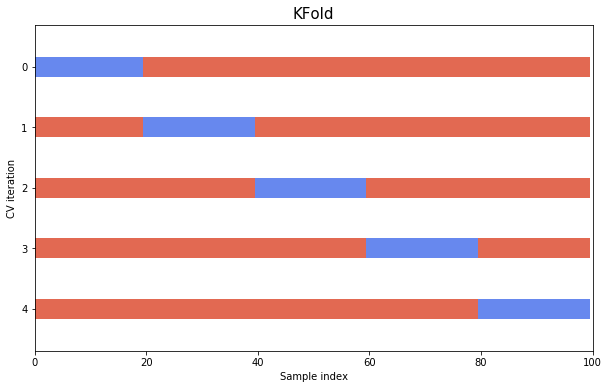

In [27]:
# Some random data points
n_points = 100
X = np.random.randn(n_points, 10)
y = np.random.randn(n_points)

fig, ax = plt.subplots(figsize=(10, 6))
cv = KFold(5)
_ = plot_cv_indices(cv, X, y, ax)

# TODO: add summary here